In [1]:
# load modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.power import FTestAnovaPower, TTestIndPower, TTestPower
from pingouin import ttest, anova
import pingouin as pg
data_dir = 'plots_from_papers'

# Calculating statistical power for a secondary analysis
Because this is a secondary analysis the sample has already been collected. In order to have this pre-registration accepted we have to provide sufficient justification that our dataset will achieve the minimum effect size necessary for our statistical tests to reach 80% power. Ideally, for each statistical test (3.1.1-4, 3.2.1-4, and 3.3.1-8 - 16 tests total) we would provide sufficient justification that the dataset can achieve the minimum effect size necessary based on previous work. Below is a closer breakdown of the hypotheses for each analysis and the studies that either support (SUPPORT) or do not support (NO SUPPORT) the proposed hypotheses. Effect sizes for these studies are either gathered from the paper or by taking data from the paper and estimating the effect sizes from the datapoints in figures.

- 3.0 Event boundary response during movie viewing (single sample t-test)
    - 3.0 Adults > 0
        - SUPPORT: 
            - BOUNDARY RESPONSE (Reagh et al., 2020) However, the effect sizes are likely stronger in there analysis compared to our dataset i.e., because they had events. 
            - CONNECTIVITY RESPONSE (Cooper et al., 2021) However, effect sizes are calculated on 'aggregated' ROIs  instead of specific between HPC and slow regions.
<br><br>

- 3.1 Univariate response to event boundaries (independent samples t-test)
    - 3.1.1 Adults > child 1
        - SUPPORT: Ofen et al. 2012 - PPC, Golarai et al. 2007, PPA (PHC)
        - NO SUPPORT: Ofen et al. 2012 - HPC, Scherf et al. 2007, Ghetti & Bunge 2012, Demaster & Ghetti, 2013
            - **These studies don't always show greater effects in adults compared to children - they are often similar in magnitude. However, this potentially supports the idea that childrens' slow and fast systems become adult-like with sufficient repetitions. The question then becomes are two repetitions enough**
    - 3.1.2 Fast child 1 > Slow child 1 (anova)
        - SUPPORT: 
        - NO SUPPORT: Ofen et al., 2012 show the opposite pattern (PPC > HPC) in children.
    - 3.1.3 Child 2 > Child 1 
    - 3.1.4 Adult > Child 2
        - SUPPORT: see 3.1.1?
        - NO SUPPORT: see 3.1.1?
<br><br>

- 3.2 Connectivity between hippocampus and slow regions at event boundaries (independent samples t-test)
    - Riggins et al. 2016, Blankenship et al. 2017
    - 3.1.1 Adults > child 1
    - 3.1.2 Fast child 1 > Slow child 1 (anova)
    - 3.1.3 Child 2 > Child 1 
    - 3.1.4 Adult > Child 2
<br><br>

- 3.3 Univariate response to event boundaries (independent samples t-test)
    - Fandacova et al. 2019, Baldassano et al., 2017
    - 3.1.1 Adults > child 1
        - SUPPORT: 
        - NO SUPPORT: 
    - 3.1.2 Fast child 1 > Slow child 1 (anova)
    - 3.1.3 Child 2 > Child 1 
    - 3.1.4 Adult > Child 2
<br><br>

/Users/anthonydutcher/anaconda3/envs/TA/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/anthonydutcher/anaconda3/envs/TA/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/anthonydutcher/anaconda3/envs/TA/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


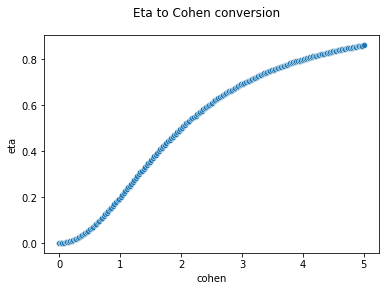

In [2]:
cohens_list = list()
cohens = np.linspace(0,5,200)
for cohen in cohens:
    eta = pg.convert_effsize(cohen, 'cohen', 'eta-square')
    cohens_list.append([eta, cohen])
conversion = pd.DataFrame(cohens_list, columns = ['eta', 'cohen'])
sns.scatterplot(conversion.cohen, conversion.eta)
plt.suptitle('Eta to Cohen conversion')
None

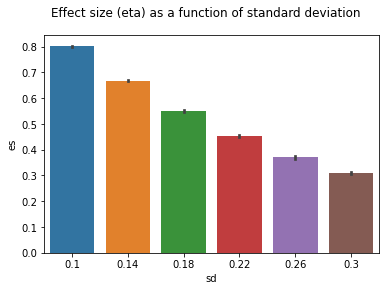

Sample Size: 0.534


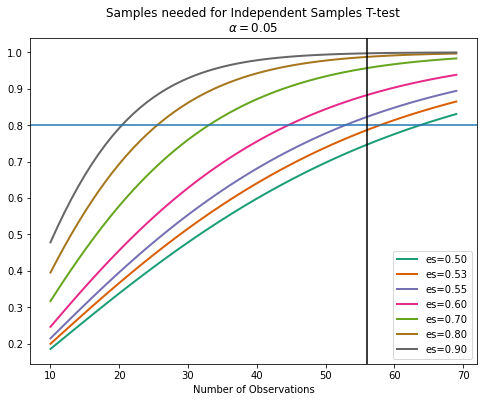

# Null effects for developmental differences.

In [ ]:
n_child = 23
n_adult = 18
ppc_file = 'demaster_2013_kids-adults/demaster_2013_left-ppc_kid-adult.csv'
full_file = os.path.join(data_dir, ppc_file)
df = simulate_bar_graph_data(full_file, n_child, n_adult)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
fig = FTestAnovaPower().plot_power(dep_var='nobs',
                                   nobs = np.arange(10, 100),
                                   effect_size = np.array([0.4, 0.5, 0.6, 0.7,  0.8]),
                                   alpha = 0.05,
                                   ax=ax, title='power of anova' + '\n' + r'$\alpha = 0.05$')
plt.axhline(0.8)
None

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs = np.arange(10, 80),
                                 effect_size = np.array([0.5, 0.525, 0.55, 0.6, 0.7, 0.8, 0.9]),
                                 alpha = 0.05,
                                 ax=ax, title='power of T-test' + '\n' + r'$\alpha = 0.05$')
plt.axhline(0.8)
plt.axvline(56, color='k')
None